In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [ ]:
raw_data = pd.read_csv('../../data/movies.csv')
print(raw_data.shape)
print(raw_data.dtypes)
raw_data

540                                     Lola's Secret
1760                                      Bad Boys II
2001                                   Ebola Syndrome
2160                                              Dog
2340             The Prince & Me 2: The Royal Wedding
2660                                      Sex Is Zero
2740                                          V/H/S/2
2741                Mortal Kombat Legends: Cage Match
2780                      Barbie Presents: Thumbelina
2940                                       Cinderella
2941                   The Nut Job 2: Nutty by Nature
2980                                   Suitable Flesh
2981                         Justice League: Warworld
2982              The Naked Gun 2½: The Smell of Fear
3560    SpongeBob SquarePants Presents The Tidal Zone
3600                                            Porno
3640                                     Sooryavanshi
3860                                        Ballerina
Name: title, dtype: object

In [16]:
unnesscarry_columns = ['backdrop_path', 'overview', 'poster_path', 'video', 'original_language', 'production_companies', 'production_countries', 'spoken_languages', 'status', 'tagline']
duplicated_columns = ['original_title' , 'genres', 'revenue']   

data = raw_data.drop(columns=unnesscarry_columns + duplicated_columns)


18

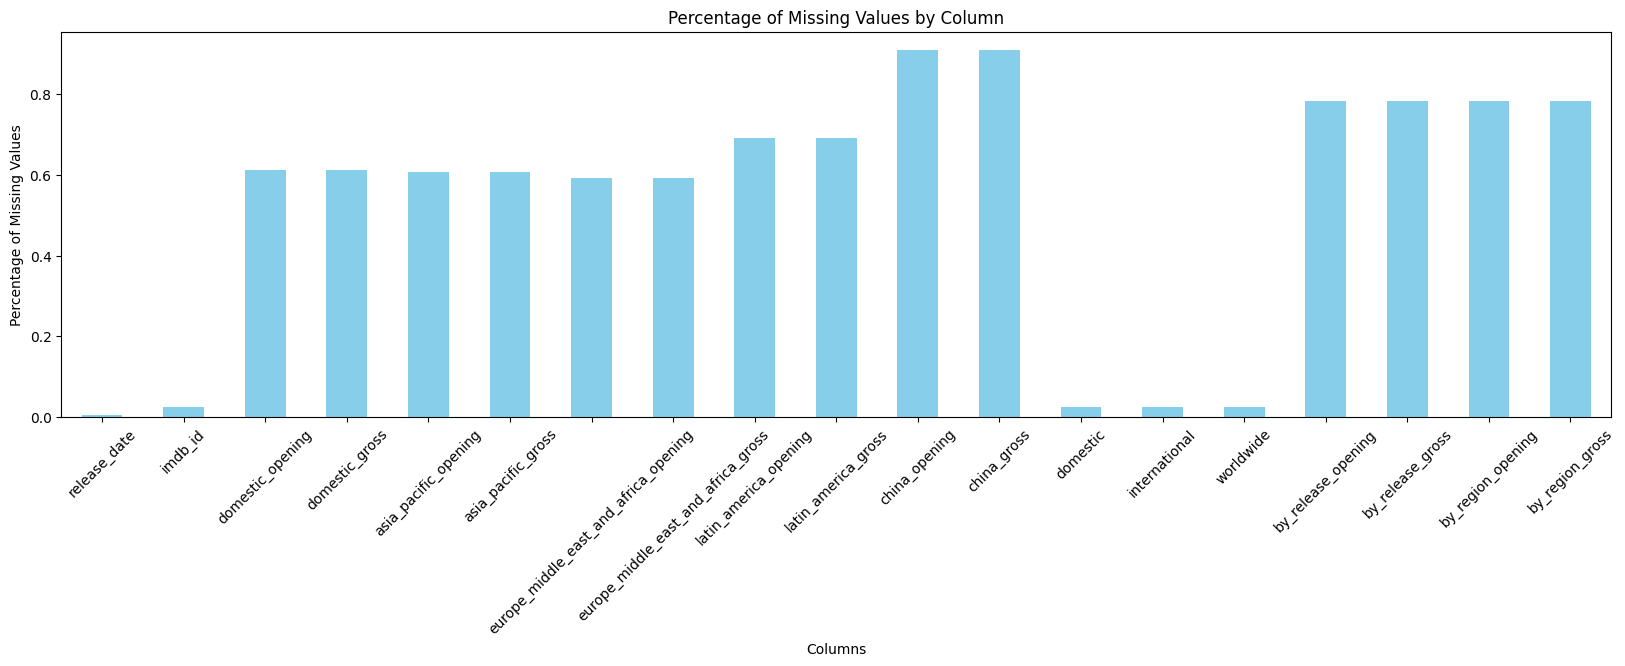

In [4]:
missing_values = data.isnull().mean()
missing_values = missing_values[missing_values > 0]
missing_values.plot(kind='bar', figsize=(20, 5), color='skyblue')
plt.title("Percentage of Missing Values by Column")
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing Values")
plt.xticks(rotation=45)
plt.show()

In [5]:
threshold = 0.5
columns_to_drop = missing_values[missing_values > threshold].index
columns_to_drop

Index(['domestic_opening', 'domestic_gross', 'asia_pacific_opening',
       'asia_pacific_gross', 'europe_middle_east_and_africa_opening',
       'europe_middle_east_and_africa_gross', 'latin_america_opening',
       'latin_america_gross', 'china_opening', 'china_gross',
       'by_release_opening', 'by_release_gross', 'by_region_opening',
       'by_region_gross'],
      dtype='object')

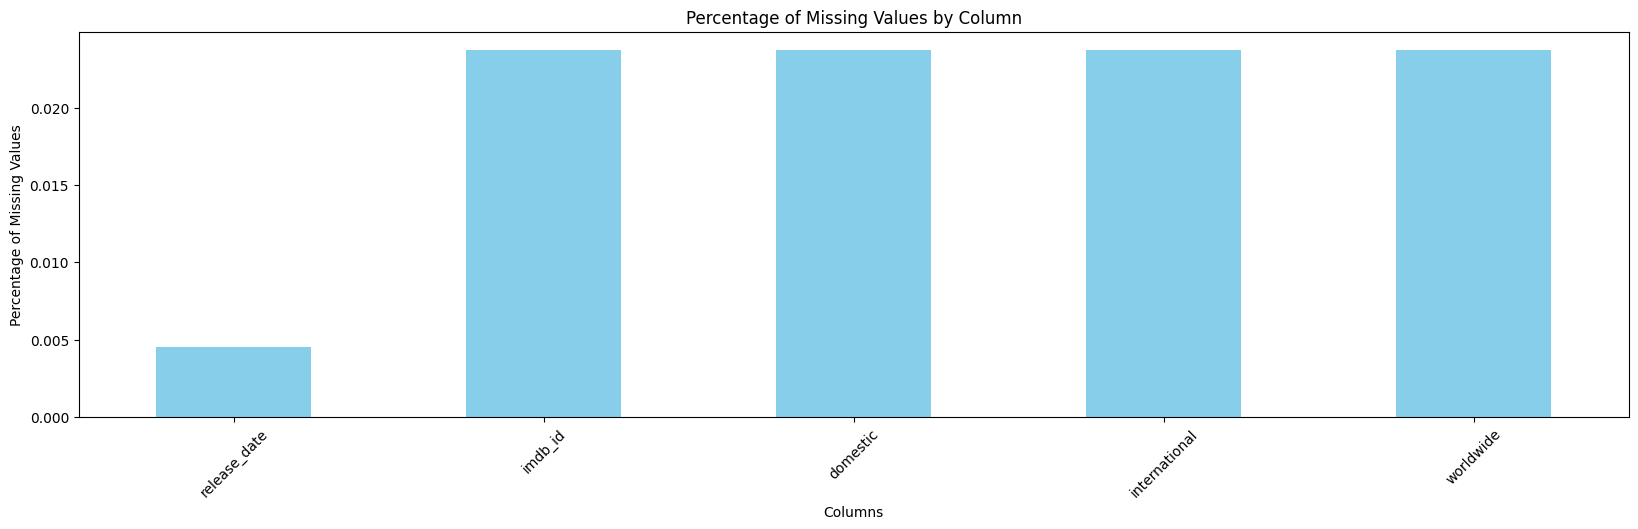

In [6]:
data.drop(columns=columns_to_drop, inplace=True)

missing_values = data.isnull().mean()
missing_values = missing_values[missing_values > 0]
missing_values.plot(kind='bar', figsize=(20, 5), color='skyblue')
plt.title("Percentage of Missing Values by Column")
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing Values")
plt.xticks(rotation=45)
plt.show()

In [7]:
drop_index = data[(data['worldwide'] == 0) | (data['budget'] == 0)].index
data = data.drop(drop_index, axis=0).reset_index(drop=True)
data.shape

(2318, 14)

In [8]:
data.dropna(subset=data.columns.difference(['imdb_id']), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2317 entries, 0 to 2317
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   adult          2317 non-null   bool   
 1   genre_ids      2317 non-null   object 
 2   id             2317 non-null   int64  
 3   popularity     2317 non-null   float64
 4   release_date   2317 non-null   object 
 5   title          2317 non-null   object 
 6   vote_average   2317 non-null   float64
 7   vote_count     2317 non-null   int64  
 8   budget         2317 non-null   int64  
 9   imdb_id        2317 non-null   object 
 10  runtime        2317 non-null   int64  
 11  domestic       2317 non-null   float64
 12  international  2317 non-null   float64
 13  worldwide      2317 non-null   float64
dtypes: bool(1), float64(5), int64(4), object(4)
memory usage: 255.7+ KB


In [9]:
data['years_from_release'] = 2024 - pd.to_datetime(data['release_date']).dt.year
data = data.drop(columns=['release_date'])

In [10]:
with open('../../data/genres.json') as f:
    genre_ids = {i['id']: 'genre_' + i['name'].replace(' ', '_') for i in json.load(f)['genres']}
for id, genre in genre_ids.items():
    data[genre] = data['genre_ids'].apply(lambda x: str(id) in x)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2317 entries, 0 to 2317
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  2317 non-null   bool   
 1   genre_ids              2317 non-null   object 
 2   id                     2317 non-null   int64  
 3   popularity             2317 non-null   float64
 4   title                  2317 non-null   object 
 5   vote_average           2317 non-null   float64
 6   vote_count             2317 non-null   int64  
 7   budget                 2317 non-null   int64  
 8   imdb_id                2317 non-null   object 
 9   runtime                2317 non-null   int64  
 10  domestic               2317 non-null   float64
 11  international          2317 non-null   float64
 12  worldwide              2317 non-null   float64
 13  years_from_release     2317 non-null   int32  
 14  genre_Action           2317 non-null   bool   
 15  genre_Adv

In [11]:
data = data.loc[:, (data != 0).any(axis=0)]
cleaned_data = data.drop(columns=['genre_ids'])

In [12]:
cleaned_data.set_index('id', inplace=True)

In [13]:
cols = [col for col in cleaned_data.columns if col not in ['domestic', 'international', 'worldwide']]
cleaned_data = cleaned_data[cols + ['domestic', 'international', 'worldwide']]

In [14]:
cleaned_data.to_csv('../../data/cleaned_movies.csv', index=False)

In [15]:
cleaned_data.isnull().mean()

popularity               0.0
title                    0.0
vote_average             0.0
vote_count               0.0
budget                   0.0
imdb_id                  0.0
runtime                  0.0
years_from_release       0.0
genre_Action             0.0
genre_Adventure          0.0
genre_Animation          0.0
genre_Comedy             0.0
genre_Crime              0.0
genre_Documentary        0.0
genre_Drama              0.0
genre_Family             0.0
genre_Fantasy            0.0
genre_History            0.0
genre_Horror             0.0
genre_Music              0.0
genre_Mystery            0.0
genre_Romance            0.0
genre_Science_Fiction    0.0
genre_TV_Movie           0.0
genre_Thriller           0.0
genre_War                0.0
genre_Western            0.0
domestic                 0.0
international            0.0
worldwide                0.0
dtype: float64